<a href="https://colab.research.google.com/github/Natou22/Datawiz-Movies-TvShows-Platforms/blob/main/DatawizProject_Natacha_Steven_DIA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  DATAVIZ PROJECT
---
#### Steven LE MOAL & Natacha Batmini BATMANABANE DIA1

We have chosen 3 datasets:
1.   https://www.kaggle.com/datasets/ruchi798/movies-on-netflix-prime-video-hulu-and-disney
2.   https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney
3. https://www.kaggle.com/datasets/bohnacker/country-longitude-latitude

## Summary

  - [Part 1](#exercise-1) : Context and motivation
  - [Part 2](#exercise-2) : Installation
  - [Part 3](#exercise-3) : Preprocessing
  - [Part 4](#exercise-4) : Visualisations

  I. Movies on Streaming Platforms
                      
    - [1. Numbers of Movies by platform](#exercise-4.1)
    - [2. IMDb ratings by film release year](#exercise-4.2)
    - [3. Top 10 movie languages by platform](#exercise-4.3)
    - [4. Number of movies worldwide by platform](#exercise-4.4)
    - [5. Average Imdb and Rotten Tomatoes ratings by movie release year](#exercise-4.5)
    - [6. Top 15 languages with long-running movies by platform](#exercise-4.6)
    - [7. Top 10 directors by platforms](#exercise-4.7)
    - [8. Top 10 directors with the best IMDB score by platforms](#exercise-4.8)
    - [9. Movie genres by platform](#exercise-4.9)
    - [10. Runtime Per Platform Along with Age Group](#exercise-4.10)

  II. TV Shows on Streaming Platforms

    - [1. IMDb Rating Distribution by Platform](#exercise-5.1)
    - [2. Year of production of series by platforms](#exercise-5.2)
    - [3. IMDb and Rotten Tomatoes ratings comparison by platforms](#exercise-5.3)
    - [4. Distribution of Recommended Age by Platform](#exercise-5.4)
  
 Conclusion

  <a name="exercise-1">

### Part 1 : Context and motivation
---

Ruchi Battia, a Kaggle user scrapped a list of movies available on various streaming platforms (the first dataset). She also did the same with TV shows on streaming platforms (the second one).

The 4 streamings platforms are:

1.   **Netflix**
2.   **Hulu**
3.   **Prime Video**
4.   **Disney+**

We will use the 3rd dataset to merge with the country field to retrieve the location for graphing with a map.

We'll try to answer this question:

***How do viewer preferences, movies and TV series characteristics and platform availability relate to each other? What are the strategies of the 4 platforms?***


  <a name="exercise-2">

### Part 2 : Installation
---


In [1]:
!pip install pandas squarify geopy panel plotly bokeh nbconvert

In [2]:
!pip install bokeh --upgrade


In [3]:
import pandas as pd
import numpy as np
import panel as pn
import csv
import warnings
import logging
from ipywidgets import interact, Dropdown, widgets

# Bokeh imports for plotting
from bokeh.plotting import figure, show, curdoc, output_file, save
from bokeh.layouts import column, gridplot
from bokeh.models import ColumnDataSource, Select, HoverTool, CustomJS, FactorRange
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20, Viridis256, Spectral10
from bokeh.io import output_notebook, show, reset_output
import pandas as pd
from bokeh.plotting import figure, show, output_notebook

from bokeh.models import ColumnDataSource, HoverTool, Select
from bokeh.layouts import column
from bokeh.io import curdoc

# Plotly imports for interactive plotting
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
from plotly.offline import plot
import pandas as pd
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Squarify for treemap layouts
from squarify import normalize_sizes, squarify


In [4]:
warnings.filterwarnings('ignore')
%matplotlib inline
pio.renderers.default = 'colab'

In [5]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab_Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab_Notebooks


  <a name="exercise-3">

### Part 3 : Preprocessing
---


#### I. Movies on Streaming Platforms

In [6]:
movies_Ruchi = pd.read_csv('DATA/MoviesOnStreamingPlatforms_RUCHI.csv', sep=";")
movies_Ruchi.head(2)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010.0,13+,8.8,87%,1.0,0.0,0.0,0.0,0.0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999.0,18+,8.7,87%,1.0,0.0,0.0,0.0,0.0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0


In [7]:
movies_Ruchi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16743 non-null  float64
 2   Age              7353 non-null   object 
 3   IMDb             16172 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16743 non-null  float64
 6   Hulu             16743 non-null  float64
 7   Prime Video      16743 non-null  float64
 8   Disney+          16743 non-null  float64
 9   Type             16743 non-null  float64
 10  Directors        16017 non-null  object 
 11  Genres           16468 non-null  object 
 12  Country          16308 non-null  object 
 13  Language         16144 non-null  object 
 14  Runtime          16151 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.9+ MB


In [8]:
movies_Ruchi['Year'] = movies_Ruchi['Year'].fillna(0).astype(int)

In [9]:
movies_Ruchi['Country'] = movies_Ruchi['Country'].astype(str)
movies_Ruchi['Country'] = movies_Ruchi['Country'].str.split(',')

In [10]:
movies_Ruchi['IMDb'] = pd.to_numeric(movies_Ruchi['IMDb'], errors='coerce')

In [11]:
movies_Ruchi['Directors'] = movies_Ruchi['Directors'].apply(lambda x: x.split(',') if pd.notnull(x) else x)

In [12]:
movies_Ruchi['Genres'] = movies_Ruchi['Genres'].str.split(',')

#### II. TV Shows on Streaming Platforms

In [13]:
Tvshows_Ruchi = pd.read_csv('DATA/tv_shows.csv', sep=",")
Tvshows_Ruchi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5368 non-null   int64 
 1   ID               5368 non-null   int64 
 2   Title            5368 non-null   object
 3   Year             5368 non-null   int64 
 4   Age              3241 non-null   object
 5   IMDb             4406 non-null   object
 6   Rotten Tomatoes  5368 non-null   object
 7   Netflix          5368 non-null   int64 
 8   Hulu             5368 non-null   int64 
 9   Prime Video      5368 non-null   int64 
 10  Disney+          5368 non-null   int64 
 11  Type             5368 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 503.4+ KB


In [14]:
Tvshows_Ruchi.isnull().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                2127
IMDb                962
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

In [15]:
Tvshows_Ruchi.drop(columns=['Unnamed: 0','Type'], inplace=True)
Tvshows_Ruchi.dropna(subset=['Age'], inplace=True)
Tvshows_Ruchi.dropna(subset=['IMDb'], inplace=True)

In [16]:
Tvshows_Ruchi.head(2)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0


In [17]:
Tvshows_Ruchi['IMDb'] = Tvshows_Ruchi['IMDb'].str.replace('/10', '').astype(float)

In [18]:
Tvshows_Ruchi['Rotten Tomatoes'] = Tvshows_Ruchi['Rotten Tomatoes'].apply(lambda x: int(x.split('/')[0])/10 if pd.notna(x) else None)

In [19]:
Tvshows_Ruchi.head(3)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4,10.0,1,0,0,0
1,2,Stranger Things,2016,16+,8.7,9.6,1,0,0,0
2,3,Attack on Titan,2013,18+,9.0,9.5,1,1,0,0


#### Functions

In [20]:
def separer_langues(df, colonne_langue):
    # Créer une série avec les langues séparées
    langues_separees = df[colonne_langue].str.split(',', expand=True).stack()
    # Associer les langues séparées avec les autres colonnes de la ligne originale
    langues_separees.index = langues_separees.index.droplevel(-1)  # pour retirer un niveau d'index
    langues_separees.name = colonne_langue
    df_separes = df.drop(colonne_langue, axis=1).join(langues_separees)
    return df_separes

In [21]:
def treemap(df, col, x, y, w, h):
    sizes = df[col].values
    normed_sizes = normalize_sizes(sizes, w, h)
    rects = squarify(normed_sizes, x, y, w, h)
    rects_df = pd.DataFrame(rects)
    rects_df = rects_df.join(df.reset_index(drop=True))
    return rects_df

def normalize_sizes(sizes, dx, dy):
    total_size = sum(sizes)
    total_area = dx * dy
    sizes = [size / total_size * total_area for size in sizes]
    return sizes

def create_treemap(selected_platform):
    filtered_data = all_genres[all_genres['Platform'] == selected_platform]
    # Add dynamic title based on selected platform
    title = f"Genre Distribution - {selected_platform}"
    fig = px.treemap(filtered_data, path=['Genre'], values='Count',
                     color='Count', color_continuous_scale='RdBu', title=title)
    fig.update_layout(width=1000, height=500)
    return fig

  <a name="exercise-4">

### Part 4 : Visualisations
---

In [22]:
platforms_colors = {
    'Netflix': '#E50914',      # Rouge Netflix
    'Disney+': '#113CCF',      # Bleu Disney+
    'Hulu': '#1CE783',         # Vert Hulu
    'Prime Video': '#00A8E1'   # Bleu Amazon Prime
}

platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
list_age = ['7+', '13+', '16+', '18+', 'all']

In [23]:
platform_widget = widgets.Dropdown(
    options=['All'] + list(platforms_colors.keys()),
    value='All',
    description='Platforms:',
)

## I. Movies on Streaming Platforms

<a name="exercise-4.1">
  
#### **1. Numbers of Movies by platform**

In [24]:
netflix_count = movies_Ruchi['Netflix'].sum()
hulu_count = movies_Ruchi['Hulu'].sum()
prime_video_count = movies_Ruchi['Prime Video'].sum()
disney_count = movies_Ruchi['Disney+'].sum()

counts = [netflix_count, hulu_count, prime_video_count, disney_count]
sorted_indices = sorted(range(len(counts)), key=lambda k: counts[k])
sorted_counts = [counts[i] for i in sorted_indices]
sorted_plateformes = [platforms[i] for i in sorted_indices]
sorted_colors = [platforms_colors[plateforme] for plateforme in sorted_plateformes]

In [25]:
sorted_counts

[564.0, 903.0, 3560.0, 12353.0]

In [26]:
fig = go.Figure(data=[
    go.Bar(
        x=sorted_plateformes,
        y=sorted_counts,
        marker_color=sorted_colors
    )
])

fig.update_layout(
    title='Number of Movies by Platform',
    xaxis=dict(title='Platform'),
    yaxis=dict(title='Number of Movies'),
    showlegend=False
)

fig.show()

In [27]:
pio.write_html(fig, file='Datawiz_Natacha_Steven_DIA1/1_NumberMoviesByPlatforms.html', auto_open=True)

Prime Video is by far the service with more movies and tv shows, followed by Netflix. Netflix, Hulu and Disney+ together still don't reach half the quantity of movies available on Prime Video

  <a name="exercise-4.2">

#### **2. IMDb ratings by film release year**


In [28]:
netflix_movies = movies_Ruchi[movies_Ruchi['Netflix'] == 1.0]
filtered_netflix_movies = netflix_movies[(netflix_movies['Year'] > 0) & (netflix_movies['IMDb'].notna())]
average_ratings_by_year_netflix = filtered_netflix_movies.groupby('Year')['IMDb'].mean().reset_index()

hulu_movies = movies_Ruchi[movies_Ruchi['Hulu'] == 1.0]
filtered_hulu_movies = hulu_movies[(hulu_movies['Year'] > 0) & (hulu_movies['IMDb'].notna())]
average_ratings_by_year_hulu = filtered_hulu_movies.groupby('Year')['IMDb'].mean().reset_index()

prime_movies = movies_Ruchi[movies_Ruchi['Prime Video'] == 1.0]
filtered_prime_movies = prime_movies[(prime_movies['Year'] > 0) & (prime_movies['IMDb'].notna())]
average_ratings_by_year_prime = filtered_prime_movies.groupby('Year')['IMDb'].mean().reset_index()

disney_movies = movies_Ruchi[movies_Ruchi['Disney+'] == 1.0]
filtered_disney_movies = disney_movies[(disney_movies['Year'] > 0) & (disney_movies['IMDb'].notna())]
average_ratings_by_year_disney = filtered_disney_movies.groupby('Year')['IMDb'].mean().reset_index()

netflix_source = ColumnDataSource(data=average_ratings_by_year_netflix)
hulu_source = ColumnDataSource(data=average_ratings_by_year_hulu)
prime_source = ColumnDataSource(data=average_ratings_by_year_prime)
disney_source = ColumnDataSource(data=average_ratings_by_year_disney)

sources = {
    'Netflix': netflix_source,
    'Hulu': hulu_source,
    'Prime Video': prime_source,
    'Disney+': disney_source
}

netflix_movies['Platform'] = 'Netflix'
hulu_movies['Platform'] = 'Hulu'
prime_movies['Platform'] = 'Prime Video'
disney_movies['Platform'] = 'Disney+'

all_movies = pd.concat([netflix_movies, hulu_movies, prime_movies, disney_movies])

filtered_all_movies = all_movies[(all_movies['Year'] > 0) & (all_movies['IMDb'].notna())]
average_ratings_by_year_all = filtered_all_movies.groupby(['Platform', 'Year'])['IMDb'].mean().reset_index()


In [29]:
average_ratings_by_year_all

,Platform,Year,IMDb
0,Disney+,1921,7.000000
1,Disney+,1922,7.200000
2,Disney+,1923,7.300000
3,Disney+,1928,7.600000
4,Disney+,1932,6.800000
...,...,...,...
305,Prime Video,2016,5.571635
306,Prime Video,2017,5.632913
307,Prime Video,2018,5.530695
308,Prime Video,2019,5.708642


In [30]:
reset_output()
output_notebook()
curdoc().clear()

In [75]:
initial_platform = 'Netflix'
filtered_data = average_ratings_by_year_all[average_ratings_by_year_all['Platform'] == initial_platform].copy()
filtered_data['color'] = [platforms_colors.get(x, '#ffffff') for x in filtered_data['Platform']]

# Data source for the plot
source = ColumnDataSource(filtered_data)

# Figure setup
p = figure(x_range=(average_ratings_by_year_all['Year'].min(), average_ratings_by_year_all['Year'].max()),title="IMDb Ratings by Film Release Year",  width=800, height=600)
p.line(x='Year', y='IMDb', source=source, line_width=2, color='navy')
p.circle(x='Year', y='IMDb', source=source, size=10, color='color', line_color='white')


select_widget = Select(title="Select Platform:", value=initial_platform, options=platforms)

# JavaScript callback code
callback_code = """
    // Get selected platform from the widget
    var platform = cb_obj.value;
    var data = source.data;
    var original_data = original_source.data;
    data['Year'] = [];
    data['IMDb'] = [];
    data['color'] = []; // Prepare to receive new color data

    // Loop through original data to filter by platform and update the color
    for (var i = 0; i < original_data['Platform'].length; i++) {
        if (platform === 'All' || original_data['Platform'][i] === platform) {
            data['Year'].push(original_data['Year'][i]);
            data['IMDb'].push(original_data['IMDb'][i]);
            // Push the corresponding color from the platforms_colors, accessed via global variable
            data['color'].push(platforms_colors[original_data['Platform'][i]]);
        }
    }

    // Update the data source with the new data
    source.change.emit();
"""

# Set up the callback
callback = CustomJS(args=dict(source=source, original_source=ColumnDataSource(average_ratings_by_year_all), platforms_colors=platforms_colors), code=callback_code)
select_widget.js_on_change('value', callback)

# Layout
layout = column(select_widget, p)

# Output file
output_file("Datawiz_Natacha_Steven_DIA1/2_ImdbMoviesReleaseYearByplatform.html")

# Show and save the plot
show(layout)
save(layout)


'/content/drive/MyDrive/Colab_Notebooks/Datawiz_Natacha_Steven_DIA1/2_ImdbMoviesReleaseYearByplatform.html'

**Netflix**: Imdb ratings on Netflix seem constant over time, with a slight downward trend in the 2000s. The 1970s and 1980s seem to have higher ratings on average, which may reflect a selection of classic or well-rated films from these decades.

**Hulu**: Imdb ratings on Hulu are diverse with significant peaks at certain times, such as 1990 with a rating of 8.25, which could indicate the presence of a classic or very popular film that year. In general, ratings seem to decline slightly in the 2010s.

**Prime Video**: Prime Video shows a large number of films with IMDb ratings that seem to have been gradually declining since the 1920s. This may suggest that Prime has a large collection of classic films, but that the perceived quality of more recent additions may not be as high.

**Disney+**: There's a trend towards relatively high scores in the 1930s to 1960s, which is often considered Disney's golden age with many classics. Ratings fluctuate thereafter, but seem to show some increase in the 2010s.

<a name="exercise-4.3">

#### **3. Top 10 movie languages by platform**

In [32]:
top_langues_separes = {}
for plateforme in platforms:
    df_plateforme = movies_Ruchi[movies_Ruchi[plateforme] == 1]
    df_langues_separes = separer_langues(df_plateforme, 'Language')
    top_langues_separes[plateforme] = df_langues_separes['Language'].value_counts().head(10)

top_langues_separes

{'Netflix': English     2264
 Hindi        377
 Spanish      332
 French       212
 German       106
 Japanese      91
 Arabic        89
 Mandarin      83
 Italian       67
 Turkish       58
 Name: Language, dtype: int64,
 'Hulu': English     815
 French       73
 Spanish      66
 German       41
 Japanese     35
 Italian      23
 Russian      18
 Mandarin     17
 Korean       16
 Danish       13
 Name: Language, dtype: int64,
 'Prime Video': English      10087
 French         522
 Spanish        493
 Hindi          424
 Italian        352
 German         341
 Mandarin       268
 Japanese       195
 Russian        157
 Cantonese      127
 Name: Language, dtype: int64,
 'Disney+': English     557
 French       30
 Spanish      20
 German       17
 Italian      11
 Mandarin      7
 Japanese      6
 Xhosa         4
 Korean        4
 Russian       4
 Name: Language, dtype: int64}

In [33]:
figures = []
output_notebook()
for plateforme, data in top_langues_separes.items():
    langues = data.index.tolist()
    counts = data.values.tolist()
    source = ColumnDataSource(data=dict(langues=langues, counts=counts))

    p = figure(x_range=langues, height=250, title=f"Top 10 Languages on {plateforme}", toolbar_location=None, tools="")
    p.vbar(x='langues', top='counts', width=0.9, source=source, line_color='white', fill_color=platforms_colors[plateforme])
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.xaxis.major_label_orientation = 1.2
    figures.append(p)

grid = gridplot(figures, ncols=2)
show(grid)



In [34]:
filename = "Datawiz_Natacha_Steven_DIA1/3_Top10MovieLanguagesByPlatform.html"
output_file(filename)
save(grid)


'/content/drive/My Drive/Colab_Notebooks/Datawiz_Natacha_Steven_DIA1/3_Top10MovieLanguagesByPlatform.html'

English is the first language for these 4 platforms, which are also American. On Hulu, Prime Video and Disney+, we have a tenadance of English, French and Spanish.
For Netflix, the 2nd most present language is Hindi (language of the North Indian region). This can be explained by the fact that India has a Netflix subsidiary.

<a name="exercise-4.4">

#### **4. Number of movies worldwide by platform**

In [35]:
movies_exploded = movies_Ruchi.explode('Country')
movies_exploded['Country'] = movies_exploded['Country'].str.strip()
movies_exploded = movies_exploded[~movies_exploded['Country'].isna()]
df_film_count_by_country = movies_exploded.groupby('Country')[platforms].sum().reset_index()

In [36]:
df_film_count_by_country.head(3)

,Country,Netflix,Hulu,Prime Video,Disney+
0,Afghanistan,0.0,0.0,4.0,0.0
1,Albania,1.0,0.0,4.0,0.0
2,Algeria,0.0,0.0,4.0,0.0


In [37]:
countries_df = pd.read_csv('DATA/longitude-latitude.csv')
countries_df.head(2)

,Country,ISO-ALPHA-3,ISO-ALPHA-2,IOC,FIFA,Latitude,Longitude,ISO-Name,Historical,WikiData_ID,WikiData_Latitude,WikiData_Longitude,WikiData_Label,WikiData_Description
0,Aruba,ABW,AW,ARU,ARU,12.52111,-69.968338,1,0,Q21203,12.51,-69.97,Aruba,"island country in the Caribbean, part of the K..."
1,Afghanistan,AFG,AF,AFG,AFG,33.93911,67.709953,1,0,Q889,33.00,66.00,Afghanistan,sovereign state situated at the confluence of ...


In [38]:
df_film_count_by_country = df_film_count_by_country.merge(countries_df, how='left', left_on='Country', right_on='Country')
df_film_count_by_country.drop(['ISO-ALPHA-3', 'ISO-ALPHA-2', 'FIFA', 'ISO-Name', 'Historical','WikiData_ID', 'WikiData_Latitude','WikiData_Longitude', 'WikiData_Label', 'IOC', 'WikiData_Description'], axis=1, inplace=True)

In [39]:
df_film_count_by_country.head(2)

,Country,Netflix,Hulu,Prime Video,Disney+,Latitude,Longitude
0,Afghanistan,0.0,0.0,4.0,0.0,33.939110,67.709953
1,Albania,1.0,0.0,4.0,0.0,41.153332,20.168331


In [40]:
scale = 1
fig = go.Figure()

for platform, color in platforms_colors.items():

    df_sub = df_film_count_by_country[df_film_count_by_country[platform] > 0]
    fig.add_trace(go.Scattergeo(
        locationmode='country names',
        lon=df_sub['Longitude'],
        lat=df_sub['Latitude'],
        text=df_sub['Country'] + '<br>' + platform + ' Films: ' + df_sub[platform].astype(str),
        marker=dict(
            size=df_sub[platform] / scale,
            color=color,
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode='area'
        ),
        name=platform
    ))


fig.update_layout(title_text='Number of Films by Country and Streaming Platform',showlegend=True,geo=dict(scope='world',landcolor='rgb(217, 217, 217)'))
fig.show()

On this map, we can see that Prime Video is present everywhere, hiding the other platforms.

In [41]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=platforms,
    specs=[[{'type': 'scattergeo'}, {'type': 'scattergeo'}],
           [{'type': 'scattergeo'}, {'type': 'scattergeo'}]]
)

for index, platform in enumerate(platforms, start=1):
    row = (index-1) // 2 + 1
    col = (index-1) % 2 + 1
    color = platforms_colors[platform]

    fig.add_trace(
        go.Scattergeo(
            lat=df_film_count_by_country['Latitude'],
            lon=df_film_count_by_country['Longitude'],
            text=df_film_count_by_country['Country'] + ": " + df_film_count_by_country[platform].astype(str),
            marker=dict(
                size=df_film_count_by_country[platform],
                color=color,
                sizemode='area',
                sizeref=2.*max(df_film_count_by_country[platform])/(40.**2),
                sizemin=4,
                line=dict(width=0)
            ),
            name=platform
        ),
        row=row, col=col
    )

fig.update_layout(
    title_text='Number of Films Available by Country for Different Platforms',
    showlegend=True,
    geo=dict(
        projection_type="natural earth",
        showland=True,
        landcolor="rgb(243, 243, 243)",
        countrycolor="rgb(204, 204, 204)"
    ),
)

for i in range(1, 5):
    fig['layout'][f'geo{i}'].update(
        projection_type="natural earth",
        showland=True,
        landcolor="rgb(243, 243, 243)",
        countrycolor="rgb(204, 204, 204)",
        showcountries=True,
        countrywidth=0.5
    )

fig.show()

In [42]:
name_file = "Datawiz_Natacha_Steven_DIA1/4_NumberMoviesWorldwideByPlatform.html"
plot(fig, filename=name_file)

'Datawiz_Natacha_Steven_DIA1/4_NumberMoviesWorldwideByPlatform.html'

More films are streamed in the USA on all platforms. In second place is Europe, practically. In second place for Netflix is India. Prime Video remains the world's biggest streamer.

<a name="exercise-4.5">

#### **5. Average Imdb and Rotten Tomatoes ratings by movie release year**

In [43]:
temp_movies = movies_Ruchi[(movies_Ruchi['Year'].notna()) & (movies_Ruchi['Year'] != 0)]
temp_movies['Rotten Tomatoes'] = pd.to_numeric(temp_movies['Rotten Tomatoes'].str.replace('%', ''),errors='coerce') / 100
temp_movies['IMDb'] = temp_movies['IMDb'].astype(float) / 10
years = temp_movies['Year'].dropna().unique()
years.sort()

In [44]:
temp_movies.head(3)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,0.88,0.87,1.0,0.0,0.0,0.0,0.0,[Christopher Nolan],"[Action, Adventure, Sci-Fi, Thriller]","[United States, United Kingdom]","English,Japanese,French",148.0
1,The Matrix,1999,18+,0.87,0.87,1.0,0.0,0.0,0.0,0.0,"[Lana Wachowski, Lilly Wachowski]","[Action, Sci-Fi]",[United States],English,136.0
2,Avengers: Infinity War,2018,13+,0.85,0.84,1.0,0.0,0.0,0.0,0.0,"[Anthony Russo, Joe Russo]","[Action, Adventure, Sci-Fi]",[United States],English,149.0


In [45]:
df_animation = []

unique_years = np.sort(temp_movies['Year'].unique())

for year in unique_years:
    for platform in platforms:
        platform_films = temp_movies[(movies_Ruchi['Year'] == year) & (temp_movies[platform] == 1)]
        imdb_avg = platform_films['IMDb'].mean()
        rt_avg = platform_films['Rotten Tomatoes'].mean()
        df_animation.append({
            'Year': year,
            'Platform': platform,
            'IMDb': imdb_avg,
            'Rotten Tomatoes': rt_avg
        })

name_file = "Datawiz_Natacha_Steven_DIA1/5_RatingMoviesByPlatform.html"

fig = px.bar(
    df_animation,
    x="Platform",
    y=["IMDb", "Rotten Tomatoes"],
    labels={"value": "Average Rating", "variable": "Source"},
    color_discrete_map={"IMDb": "yellow", "Rotten Tomatoes": "red"},
    animation_frame="Year",
    range_y=[0, 1],
    title="Average Ratings by Platform Over Movies's year of realisation"
)

fig.update_layout(
    xaxis_title='Platforms',
    yaxis_title='Average Rating',
    barmode='group',
    yaxis=dict(range=[0, 1]),
    legend_title_text='Rating Source'
)

fig.show()
plot(fig, filename=name_file)

'Datawiz_Natacha_Steven_DIA1/5_RatingMoviesByPlatform.html'

IMDb ratings are based on the votes of registered users, and they can be skewed if a particular group of people with a certain bias votes more than others. Rotten Tomatoes, on the other hand, uses a different rating system that is based on the percentage of positive reviews from professional critics.
In this dataset, we can see the RT is generally higher than Imdb but we have more information of Imdb than Rotten Tomatoes.
So,it's better we use Imdb than Rotten Tomatoes for this dataset.

<a name="exercise-4.6">

#### **6. Top 15 languages with long-running movies by platform**

In [46]:
movies_exploded_by_language = separer_langues(movies_Ruchi, 'Language')

overall_runtime = movies_exploded_by_language.groupby('Language')['Runtime'].mean().reset_index()
overall_runtime.columns = ['Language', 'Mean_Runtime']

language_runtime_by_platform = pd.DataFrame()

for platform in platforms:
    platform_data = movies_exploded_by_language[movies_exploded_by_language[platform] == 1.0]
    avg_runtime_by_language = platform_data.groupby('Language')['Runtime'].mean().reset_index()
    avg_runtime_by_language.columns = ['Language', f'{platform}']
    if language_runtime_by_platform.empty:
        language_runtime_by_platform = avg_runtime_by_language
    else:
        language_runtime_by_platform = pd.merge(language_runtime_by_platform, avg_runtime_by_language, on='Language', how='outer')

language_runtime = pd.merge(overall_runtime, language_runtime_by_platform, on='Language', how='outer')

In [47]:
top_15_languages = language_runtime.sort_values(by='Mean_Runtime', ascending=False).head(15)
top_15_languages

,Language,Mean_Runtime,Netflix,Hulu,Prime Video,Disney+
18,Awadhi,171.250000,180.500000,NaN,162.000000,NaN
63,Haryanvi,170.000000,NaN,NaN,170.000000,NaN
110,Minangkabau,164.000000,164.000000,NaN,NaN,NaN
143,Sicilian,163.000000,NaN,NaN,163.000000,NaN
86,Kriolu,163.000000,163.000000,NaN,NaN,NaN
11,Aragonese,163.000000,163.000000,NaN,NaN,NaN
132,Rajasthani,151.500000,NaN,NaN,151.500000,NaN
161,Telugu,144.638889,143.833333,NaN,145.483146,NaN
24,Berber languages,143.000000,143.000000,NaN,NaN,NaN
158,Tamil,141.100671,134.431373,NaN,143.761062,NaN


In [48]:
fig = px.bar(top_15_languages,
             x='Language',
             y=['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
             title='Top 15 Languages by Average Runtime Across Platforms',
             labels={'value':'Average Runtime (min)', 'variable':'Platform'},
             barmode='group',
             color_discrete_map=platforms_colors)

fig.update_layout(
    xaxis_title="Languages",
    yaxis_title="Average Runtime (minutes)",
    legend_title="Platform",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig.show()

In [49]:
name_file = "Datawiz_Natacha_Steven_DIA1/6_Top15LanguagesByAvgRuntime.html"
plot(fig, filename=name_file)

'Datawiz_Natacha_Steven_DIA1/6_Top15LanguagesByAvgRuntime.html'

Hulu and Disney+ do not feature in this list, suggesting that their films are not as diverse in terms of languages or tend not to have as long durations as on other platforms.

In conclusion, the duration of films in these less common languages on Netflix and Prime Video may reflect the content strategy of these platforms, which seems to include regional or niche films with significant durations, probably to attract a targeted audience interested in these specific cultures. Indian culture is very present on these platforms.

<a name="exercise-4.7">

#### **7.Top 10 directors**

In [50]:
exploded_directors = movies_Ruchi.explode('Directors')

In [51]:
top_directors = exploded_directors['Directors'].value_counts().head(10).index
top_directors_data = exploded_directors[exploded_directors['Directors'].isin(top_directors)]
top_directors_counts = top_directors_data.groupby('Directors')[platforms].sum().reset_index()
top_directors_melted = top_directors_counts.melt(id_vars='Directors', var_name='Platform', value_name='Movie_Count')

In [52]:
fig = px.bar(top_directors_melted, x='Directors', y='Movie_Count', color='Platform', color_discrete_map= platforms_colors, title='Top 10 Directors')
fig.show()
name_file = "Datawiz_Natacha_Steven_DIA1/7_Top10Directors.html"
plot(fig, filename=name_file)

'Datawiz_Natacha_Steven_DIA1/7_Top10Directors.html'

Prime video has more films from the top 10 directors.

<a name="exercise-4.8">

#### **8. Top 5 directors with the best IMDB and more than one movie by platforms**

In [53]:
director_platform_counts = exploded_directors.groupby('Directors')[platforms + ['IMDb']].agg(
    {'Netflix': 'sum', 'Hulu': 'sum', 'Prime Video': 'sum', 'Disney+': 'sum', 'IMDb': 'mean'}
).reset_index()
director_platform_counts['Total_Movies'] = director_platform_counts[platforms].sum(axis=1)

In [54]:
top_directors_per_platform = pd.DataFrame()
for platform in platforms:
    platform_directors = director_platform_counts[director_platform_counts[platform] > 1]
    # Calculate a score that considers both the average IMDb score and the number of movies
    # IMDb score + (0.1 * number of movies)
    top_directors = platform_directors.sort_values(by=['IMDb'], ascending=[False])

top_netflix = top_directors[top_directors['Netflix'] > 1].sort_values('IMDb', ascending=False).head(5)
top_hulu = top_directors[top_directors['Hulu'] > 1].sort_values('IMDb', ascending=False).head(5)
top_prime_video = top_directors[top_directors['Prime Video'] > 1].sort_values('IMDb', ascending=False).head(5)
top_disney = top_directors[top_directors['Disney+'] > 1].sort_values('IMDb', ascending=False).head(5)

In [55]:
reset_output()
fig = make_subplots(rows=2, cols=2, subplot_titles=('Netflix', 'Hulu', 'Prime Video', 'Disney+'))

fig.add_trace(go.Bar(x=top_netflix['IMDb'], y=top_netflix['Directors'], name='Netflix', orientation='h', marker_color= platforms_colors['Netflix']), row=1, col=1)
fig.add_trace(go.Bar(x=top_hulu['IMDb'], y=top_hulu['Directors'], name='Hulu', orientation='h', marker_color= platforms_colors['Hulu']), row=1, col=2)
fig.add_trace(go.Bar(x=top_prime_video['IMDb'], y=top_prime_video['Directors'], name='Prime Video', orientation='h', marker_color= platforms_colors['Prime Video']), row=2, col=1)
fig.add_trace(go.Bar(x=top_disney['IMDb'], y=top_disney['Directors'], name='Disney+', orientation='h', marker_color= platforms_colors['Disney+']), row=2, col=2)

fig.update_layout(
    title_text="Top 5 Directors per Platform with the Best IMDb Score",
    height=500,
    showlegend=False
)

fig.update_xaxes(title_text="IMDb Score", row=1, col=1)
fig.update_xaxes(title_text="IMDb Score", row=1, col=2)
fig.update_xaxes(title_text="IMDb Score", row=2, col=1)
fig.update_xaxes(title_text="IMDb Score", row=2, col=2)

fig.update_yaxes(title_text="Directors", row=1, col=1)
fig.update_yaxes(title_text="Directors", row=1, col=2)
fig.update_yaxes(title_text="Directors", row=2, col=1)
fig.update_yaxes(title_text="Directors", row=2, col=2)


fig.show()
name_file = "Datawiz_Natacha_Steven_DIA1/8_Top5DirectorsByPlatform.html"
plot(fig, filename=name_file)

'Datawiz_Natacha_Steven_DIA1/8_Top5DirectorsByPlatform.html'

Sergio Leone is the best director on Netflix and Prime Video. Hulu and Disney+ have Gore Verbinski in their top 5.

<a name="exercise-4.9">


#### **9. Movie genres by platforms**

In [56]:
movies_Ruchi_exploded = movies_Ruchi.explode('Genres')

In [57]:
genre_counts = []
for platform in platforms:
    counts = movies_Ruchi_exploded[movies_Ruchi_exploded[platform] > 0]['Genres'].value_counts().reset_index()
    counts.columns = ['Genre', 'Count']
    counts['Platform'] = platform
    genre_counts.append(counts)

genre_counts_df = pd.concat(genre_counts)
x, y, w, h = 0, 0, 800, 450
all_genres = treemap(genre_counts_df, 'Count', x, y, w, h)
all_genres
all_genres['right'] = all_genres['x'] + all_genres['dx']
all_genres['top'] = all_genres['y'] + all_genres['dy']
all_genres

,x,y,dx,dy,Genre,Count,Platform,right,top
0,0.000000,0.000000,89.482340,148.222515,Drama,1501,Netflix,89.482340,148.222515
1,0.000000,148.222515,89.482340,129.163924,Comedy,1308,Netflix,89.482340,277.386438
2,0.000000,277.386438,89.482340,64.384463,Thriller,652,Netflix,89.482340,341.770902
3,0.000000,341.770902,89.482340,54.410797,Romance,551,Netflix,89.482340,396.181698
4,0.000000,396.181698,89.482340,53.818302,Action,545,Netflix,89.482340,450.000000
...,...,...,...,...,...,...,...,...,...
100,776.805001,437.809362,11.597499,12.190638,History,16,Disney+,788.402501,450.000000
101,788.402501,437.809362,11.597499,6.857234,Horror,9,Disney+,800.000000,444.666596
102,788.402501,444.666596,6.627143,5.333404,War,4,Disney+,795.029643,450.000000
103,795.029643,444.666596,4.970357,3.555603,Reality-TV,2,Disney+,800.000000,448.222199


In [58]:
pn.extension('plotly')
tabs = pn.Tabs()

for platform in all_genres['Platform'].unique():
    treemap = create_treemap(platform)
    tabs.append((platform, pn.pane.Plotly(treemap)))
tabs.servable()
tabs

Tabs
    [0] Plotly(Figure)
    [1] Plotly(Figure)
    [2] Plotly(Figure)
    [3] Plotly(Figure)

In [59]:
name_file = "Datawiz_Natacha_Steven_DIA1/9_MoviesGenreByPlatform.html"
tabs.save(name_file)


Disney+ is clearly oriented towards family audiences, with a predominance of adventure, comedy and family films.
Hulu offers a mix of drama, comedy and thriller, indicating a diversity of genres for an adult audience.
Netflix presents a vast collection of dramas, comedies and thrillers, reflecting its strategy of diversity and internationality.
Prime Video stands out for its high volume of drama, comedy and thrillers, indicating a wide selection to attract a variety of viewers.

<a name="exercise-4.10">

#### **10. Runtime Per Platform Along with Age Group**

In [60]:
melted = movies_Ruchi.melt(id_vars=['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Type', 'Directors', 'Genres', 'Country', 'Language', 'Runtime'],
                     value_vars=platforms,
                     var_name='Platform',
                     value_name='Available')

available = melted[melted['Available'] == 1.0]
average_runtime_df = available.groupby(['Platform', 'Age'])['Runtime'].mean().reset_index()

average_runtime_df


,Platform,Age,Runtime
0,Disney+,13+,124.650000
1,Disney+,16+,81.000000
2,Disney+,18+,86.666667
3,Disney+,7+,95.550562
4,Disney+,all,86.920290
5,Hulu,13+,102.577586
6,Hulu,16+,88.375000
7,Hulu,18+,100.519031
8,Hulu,7+,96.110092
9,Hulu,all,76.924528


In [61]:
reset_output()
output_notebook()
curdoc().clear()

initial_age_group = '7+'
filtered_data = average_runtime_df[average_runtime_df['Age'] == initial_age_group].copy()
filtered_data['color'] = [platforms_colors.get(x, '#ffffff') for x in filtered_data['Platform']]

source = ColumnDataSource(filtered_data)
color_mapper = factor_cmap('Platform', palette=[platforms_colors[x] for x in platforms], factors=platforms)

p = figure(x_range=platforms, height=350, title="Average Runtime by Platform and Age Group")
p.vbar(x='Platform', top='Runtime', width=0.9, source=source, line_color='white', fill_color='color')

age_groups = sorted(average_runtime_df['Age'].unique().tolist())
select_widget = Select(title="Select Age Group:", value=initial_age_group, options=age_groups)

callback_code = """
    // Get selected age group from the widget
    var age = cb_obj.value;
    var data = source.data;
    var original_data = original_source.data;
    data['Platform'] = [];
    data['Runtime'] = [];
    data['color'] = []; // Prepare to receive new color data

    // Loop through original data to filter by age and update the color
    for (var i = 0; i < original_data['Age'].length; i++) {
        if (age === 'all' || original_data['Age'][i] === age) {
            data['Platform'].push(original_data['Platform'][i]);
            data['Runtime'].push(original_data['Runtime'][i]);
            // Push the corresponding color from the platforms_colors, accessed via global variable
            data['color'].push(platforms_colors[original_data['Platform'][i]]);
        }
    }

    // It's important to update the x_range to match the new platforms
    p.x_range.factors = data['Platform'];

    // Update the data source with the new data
    source.change.emit();
"""

callback = CustomJS(args=dict(source=source, original_source=ColumnDataSource(average_runtime_df), p=p, platforms_colors=platforms_colors), code=callback_code)
select_widget.js_on_change('value', callback)

layout = column(select_widget, p)


output_file("Datawiz_Natacha_Steven_DIA1/10_RuntimeAgeGroupPerPlatform.html")
show(layout)
save(layout)


'/content/drive/My Drive/Colab_Notebooks/Datawiz_Natacha_Steven_DIA1/10_RuntimeAgeGroupPerPlatform.html'

   

*   Disney+, Hulu, Netflix, and Prime Video show the longest average runtime for the 13+ age group.
*   The shortest runtimes across platforms tend to be for the "all" age category.
*   The 13+ category typically has longer content, possibly indicating more complex or extensive series.
*   Content for all audiences tends to be shorter, likely aiming for wider appeal with concise programming.








## II. TV Shows on Streaming Platforms

<a name="exercise-5.1">

#### **1. IMDb Rating Distribution by Platform**

In [62]:
Tvshows_imdb_Platforms= Tvshows_Ruchi.melt(id_vars=['Title', 'Year', 'Age', 'IMDb'], value_vars=platforms, var_name='Platform', value_name='Available')
Tvshows_imdb_Platforms = Tvshows_imdb_Platforms[Tvshows_imdb_Platforms['Available'] == 1]

In [63]:
Tvshows_imdb_Platforms

,Title,Year,Age,IMDb,Platform,Available
0,Breaking Bad,2008,18+,9.4,Netflix,1
1,Stranger Things,2016,16+,8.7,Netflix,1
2,Attack on Titan,2013,18+,9.0,Netflix,1
3,Better Call Saul,2015,18+,8.8,Netflix,1
4,Dark,2017,16+,8.8,Netflix,1
...,...,...,...,...,...,...
12823,Disney Family Sundays,2019,all,5.6,Disney+,1
12824,Wild Chile,2018,7+,7.5,Disney+,1
12825,Howie Mandel's Animals Doing Things,2018,all,3.2,Disney+,1
12826,The Big Fib,2020,all,5.4,Disney+,1


In [64]:
fig = go.Figure()

for platform in platforms:
    platform_data = Tvshows_imdb_Platforms[Tvshows_imdb_Platforms['Platform'] == platform]
    fig.add_trace(go.Box(y=platform_data['IMDb'], name=platform, marker_color=platforms_colors[platform]))

buttons = []
for platform in platforms:
    buttons.append(dict(method='restyle',
                        label=platform,
                        visible=True,
                        args=[{'visible': [p == platform for p in platforms]},
                              {'title': f"IMDb Ratings: {platform}"}],
                        ))

fig.update_layout(
    title="Distribution of IMDb Ratings by Platform",
    xaxis_title="Platform",
    yaxis_title="IMDb Rating",
    updatemenus=[{"buttons": buttons, "direction": "down", "showactive": True}],
)

fig.show()

name_file = "Datawiz_Natacha_Steven_DIA1/11_TVshows_ImdbByPlatform.html"
plot(fig, filename=name_file)

'Datawiz_Natacha_Steven_DIA1/11_TVshows_ImdbByPlatform.html'

*    Prime Video has the highest average IMDb rating among the platforms at approximately 7.27.
*    Netflix follows closely with an average rating of around 7.15.
*    Hulu has a slightly lower average IMDb rating at about 7.13.
*    Disney+ has the lowest average IMDb rating among these platforms at approximately 6.92.

<a name="exercise-5.2">


#### **2. Year of production of series by platforms**


In [65]:
yearly_shows = Tvshows_Ruchi.groupby(['Year', 'Age'])[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum().reset_index()
yearly_shows

,Year,Age,Netflix,Hulu,Prime Video,Disney+
0,1934,all,0,1,0,0
1,1951,all,0,1,0,0
2,1952,all,0,0,1,0
3,1954,all,0,0,1,0
4,1955,16+,0,1,0,0
...,...,...,...,...,...,...
198,2020,all,20,4,3,9
199,2021,16+,14,9,2,4
200,2021,18+,45,4,5,1
201,2021,7+,14,9,3,10


In [66]:
fig = go.Figure()

for platform in platforms:
    if platform != 'All':
        filtered_data = yearly_shows[yearly_shows[platform] > 0]
    else:
        filtered_data = yearly_shows

    fig.add_trace(go.Histogram(
        x=filtered_data['Year'],
        nbinsx=20,
        name=platform,
        marker_color=platforms_colors[platform]
    ))

# Update layout and add buttons for interactivity
fig.update_layout(
    title="Year Distribution by Platform",
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label=platform,
                     method="update",
                     args=[{"visible": [platform == p for p in platforms]},
                           {"title": f"Year Distribution for {platform}"}])
                for platform in platforms
            ]),
        )
    ]
)

# Set only the 'All' trace to visible initially
fig.update_traces(visible=False)
fig.data[0].visible = True

fig.show()
# Save the interactive plot to an HTML file
fig.write_html("Datawiz_Natacha_Steven_DIA1/12_TVshows_YearProductionByPlatform.html")


*  Netflix has series ranging from as early as 1934 to as recent as 2018.
* Hulu offers series produced between 1952 and 2015.
* Prime Video also hosts series with a wide range, from 1934 to 2015.
* Disney+ features series from 1934 up to 2020, indicating some of the newest series among these platforms

<a name="exercise-5.3">


### **3. IMDb and Rotten Tomatoes ratings comparison by platforms**



In [67]:
pn.extension()
tabs = pn.Tabs()
for platform in platforms_colors.keys():
    mask = Tvshows_Ruchi[platform] == 1
    filtered_data = Tvshows_Ruchi[mask]

    x = filtered_data['IMDb']
    y = filtered_data['Rotten Tomatoes']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    fig, ax = plt.subplots()
    ax.scatter(filtered_data['IMDb'], filtered_data['Rotten Tomatoes'],
               color=platforms_colors[platform], alpha=0.5)
    ax.plot(x, p(x), "b--")
    ax.set_title(f'{platform} - IMDb vs. Rotten Tomatoes Ratings')
    ax.set_xlabel('IMDb Rating')
    ax.set_ylabel('Rotten Tomatoes Rating')
    ax.grid(True)

    panel = pn.pane.Matplotlib(fig)
    tabs.append((platform, panel))
    plt.close(fig)

Tabs
    [0] Matplotlib(Figure)
    [1] Matplotlib(Figure)
    [2] Matplotlib(Figure)
    [3] Matplotlib(Figure)
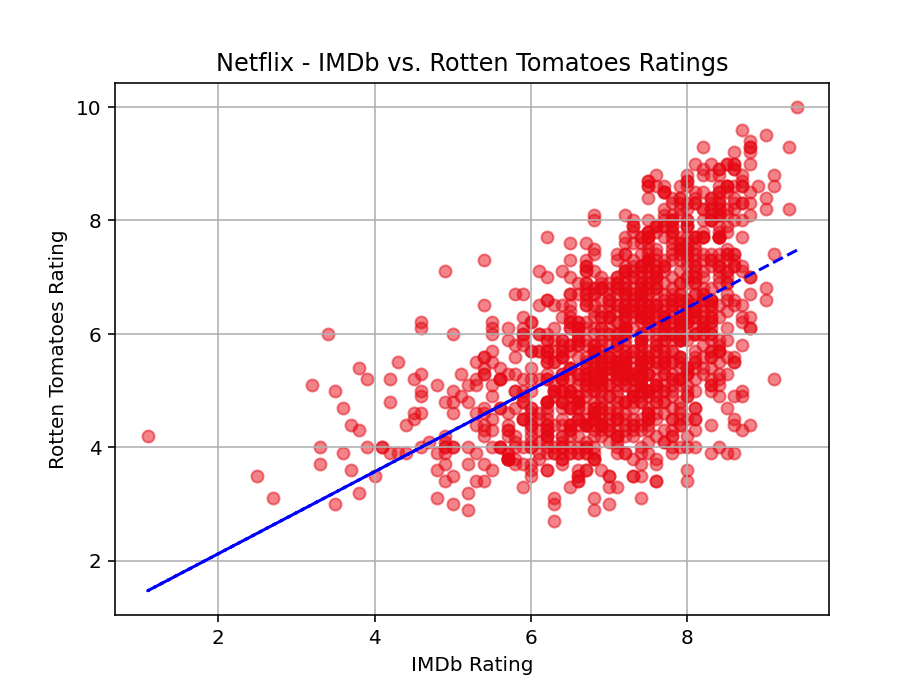
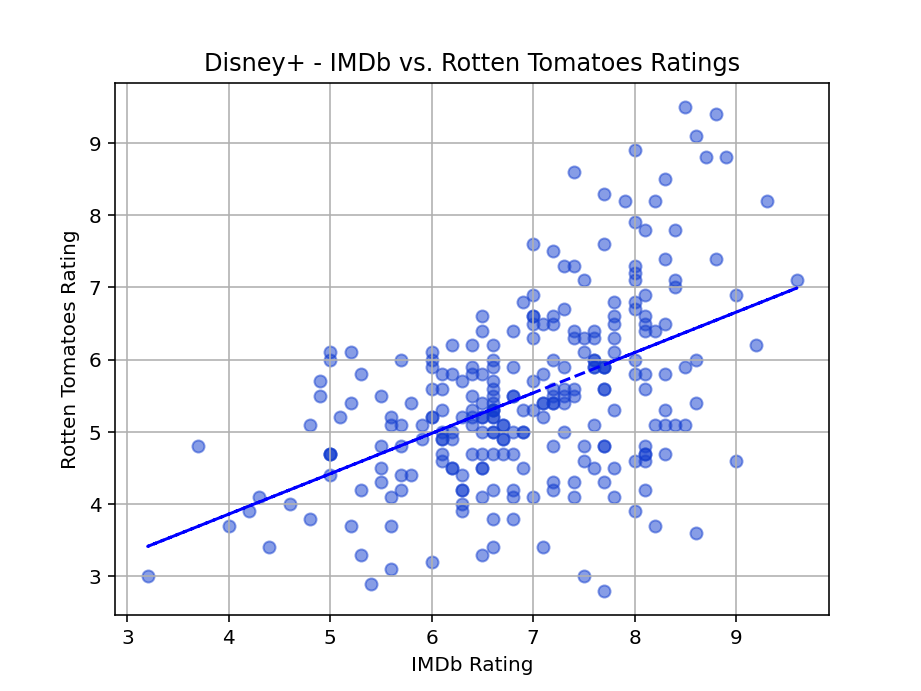
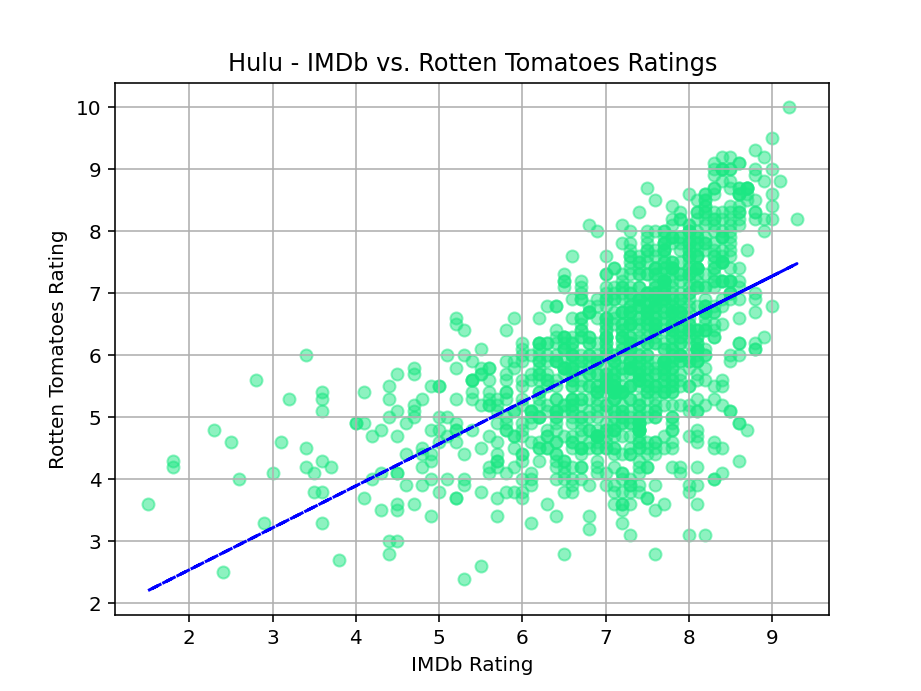
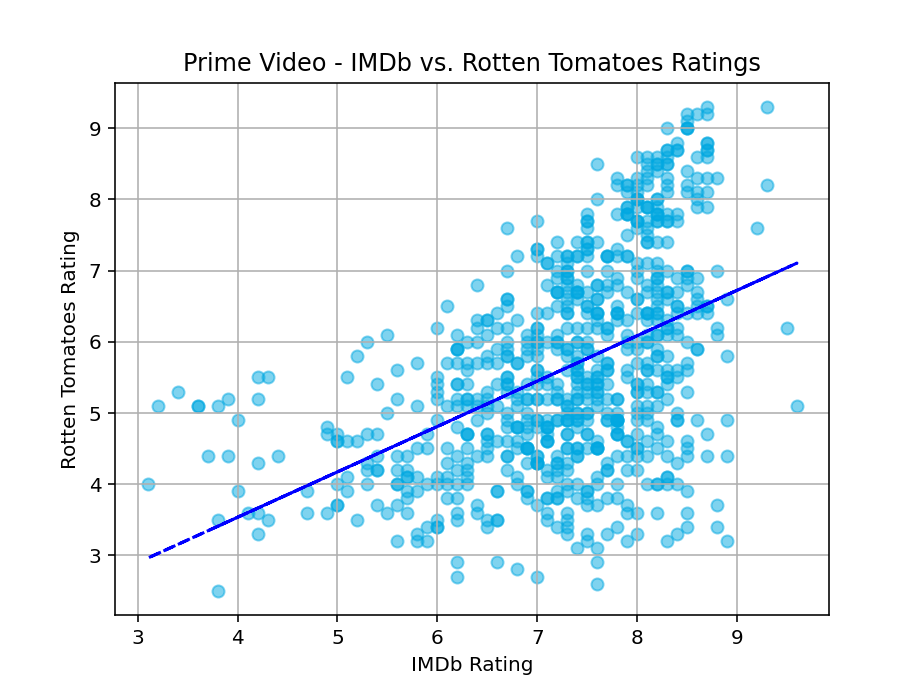

In [68]:
tabs

In [69]:
filename = "Datawiz_Natacha_Steven_DIA1/13_TVshows_ImdbRTComparisonByPlatform.html"
tabs.save(filename)

* Hulu and Netflix show moderate average ratings with a potential positive trend between IMDb and Rotten Tomatoes ratings, indicating a balanced reception of content
* Prime Video: Although it leads in average IMDb ratings, it clearly lags behind in Rotten Tomatoes ratings, suggesting a divergence in audience and critic perceptions.
* Disney+: has the lowest average IMDb ratings and moderate Rotten Tomatoes scores, which may reflect its family-oriented content and variable reception from critics and audiences.

<a name="exercise-5.4">

### **4. Distribution of Recommended Age by Platform**


In [70]:
def age_plot(platform):
    if platform != 'All':
        filtered_data = Tvshows_Ruchi[Tvshows_Ruchi[platform] == 1]
    else:
        filtered_data = Tvshows_Ruchi

    age_counts = filtered_data['Age'].value_counts()
    output_notebook()
    fig = px.pie(values=age_counts,
                 names=age_counts.index,
                 title=f"Distribution of Recommended Age for {platform}",
                 color_discrete_sequence=px.colors.sequential.RdBu)
    return fig

pn.extension()
tabs = pn.Tabs()
for platform in platforms_colors.keys():
    panel = age_plot(platform)
    tabs.append((platform, panel))

tabs

Tabs
    [0] Plotly(Figure, name='Netflix')
    [1] Plotly(Figure, name='Disney+')
    [2] Plotly(Figure, name='Hulu')
    [3] Plotly(Figure, name='Prime Video')

In [71]:
filename = "Datawiz_Natacha_Steven_DIA1/14_TVshows_AgeByPlatform.html"
tabs.save(filename)

These distributions indicate that while Netflix and Prime Video offer a broad range of content for all ages, Hulu leans slightly more towards older audiences, and Disney+ is heavily focused on younger viewers and family-oriented content.

## Conclusion

Reminder : How do viewer preferences, movies and TV series characteristics and platform availability relate to each other? What are the strategies of the 4 platforms?

* **Netflix**: Offers diverse genres, internationally focused, with a balanced age range.
* **Hulu**: Similar to Netflix but leans towards an adult audience with a variety of ratings.
* **Prime Video**: Largest content library, highly rated globally, focusing on drama and comedy.
* **Disney+**: Family-oriented with a focus on younger audiences and high-quality animated films.

In our dataset, we have more films and series from Prime Video. IMDb rankings, language distribution, director influences, genre diversity and target age groups play a key role in viewer choice and satisfaction.



# Export

In [72]:
%cd /content/drive/MyDrive/Colab_Notebooks/Datawiz_Natacha_Steven_DIA1

!zip -r Datawiz_Natacha_Steven_DIA1_HTML_Graphs.zip .

/content/drive/MyDrive/Colab_Notebooks/Datawiz_Natacha_Steven_DIA1
  adding: 1_NumberMoviesByPlatforms.html (deflated 70%)
  adding: 2_ImdbMoviesReleaseYearByplatform.html (deflated 84%)
  adding: 3_Top10MovieLanguagesByPlatform.html (deflated 84%)
  adding: 4_NumberMoviesWorldwideByPlatform.html (deflated 70%)
  adding: 5_RatingMoviesByPlatform.html (deflated 71%)
  adding: 6_Top15LanguagesByAvgRuntime.html (deflated 70%)
  adding: 7_Top10Directors.html (deflated 70%)
  adding: 8_Top5DirectorsByPlatform.html (deflated 70%)
  adding: 9_MoviesGenreByPlatform.html (deflated 90%)
  adding: 10_RuntimeAgeGroupPerPlatform.html (deflated 70%)
  adding: 11_TVshows_ImdbByPlatform.html (deflated 70%)
  adding: 12_TVshows_YearProductionByPlatform.html (deflated 70%)
  adding: 13_TVshows_ImdbRTComparisonByPlatform.html (deflated 27%)
  adding: 14_TVshows_AgeByPlatform.html (deflated 90%)


In [79]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/DatawizProject_Natacha_Steven_DIA1.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/DatawizProject_Natacha_Steven_DIA1.ipynb to html
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/widgetsdatatypefilter.py:71: UserWarning: Your element with mimetype(s) dict_keys([]) is not able to be represented.
  warn(
[NbConvertApp] Writing 2209575 bytes to /content/drive/MyDrive/Colab_Notebooks/DatawizProject_Natacha_Steven_DIA1.html
